<a href="https://colab.research.google.com/github/antonellafontanetto/Pre-Entrega-3/blob/main/Proyecto4x4YPF_datos_agrupadossinfiltro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto 4x4 YPF - Primer pilar Vaca Muerta**

El proyecto de modelado busca seguir la linea de pensamiento de desarrollo de la compañía YPF, en la actualidad este proyecto plantea cuadruplicar el crecimiento de la firma en los próximos 4 años. En primordial que este objetivo esta centrado en 4 pilares, del cual solo vamos a focalizar en el primero, que es el crecimiento de Vaca Muerta a corto plazo.

La estrategia se basa en reducir costos operativos, optimizar los tiempos de perforación y adoptar un enfoque más eficiente en la gestión financiera. La compañía ha logrado reducir los tiempos de perforación de aproximadamente un año a 170 días, mediante mejoras técnicas y operativas.

Este plan de transformación busca posicionar a YPF como una empresa más eficiente, rentable y alineada con las tendencias internacionales del sector energético, con una visión clara en el desarrollo del shale en Argentina.


## **Modelado**

En la pre entrega 2, realizamos la transformación de todas las features utilizando One Hot Encoder, ahora vamos a limpiar y decidir en función al análisis exploratorio que features tener en consideración para el modelado.

Como observamos anteriormente tanto la producción de petróleo como la producción de gas son dos datos que queremos predecir para los próximos 4 años, sin embargo el análisis estará centrado en la Cuenca Neuquina, es decir, Vaca Muerta y las cinco principales áreas de permiso de concesión tanto para la producción de petróleo como para la producción de gas.

Así como también tenemos que mencionar que el dataset está centrado únicamente en la producción de lo no convencional, es decir, de aquella extracción que requiere tecnologías más avanzadas, costosas o intensivas en recursos debido a las características del yacimiento o del propio hidrocarburo.

Finalmente, cabe mencionar que la producción de petróleo y gas se sujeta a dos subtipos de recursos, estos son shale y tight, los mismos se diferencian según el tipo de roca y suelen requerir técnicas como la fractura hidráulica (fracking) para su extracción. Mientras que el shale se extrae de la roca sedimentaria rica en materia orgánica que actúa como fuente y reservorio del hidrocarburo, el tight se encuentra en rocas porosas pero de baja permeabilidad, como areniscas o calizas muy cementadas.


In [ ]:
#descargamos todas las librerías necesarias para el desarrollo del proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#Cargamos el dataset transformado en la segunda pre-entrega
Produccion_ypf = pd.read_csv('/content/prod_encoded_df (2).csv')

#Aplicamos la función head() para visualizar las primeras 5 observaciones del dataset
Produccion_ypf.head().astype(int)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,555,18699,2021,1
1,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,472,14314,2021,2
2,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1082,19413,2021,3
3,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,678,20456,2021,4
4,1,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,2594,25454,2021,5


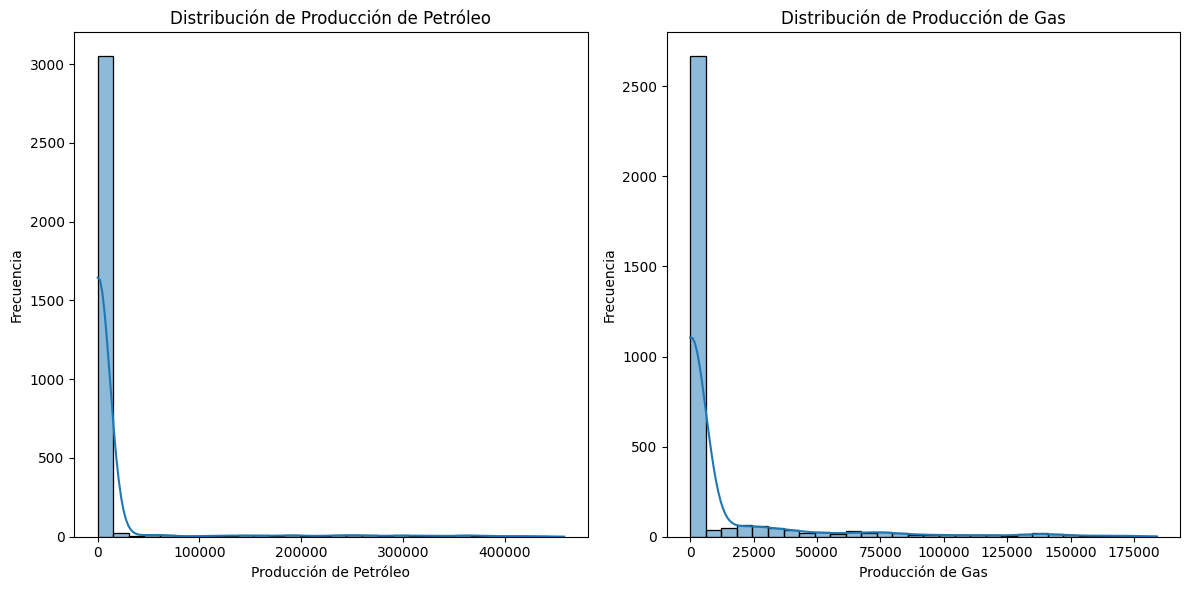

In [ ]:
#histograma de Producción de Petróleo y Producción de gas

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(Produccion_ypf['Produccion de Petroleo'], kde=True, bins=30)
plt.title('Distribución de Producción de Petróleo')
plt.xlabel('Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(Produccion_ypf['Produccion de Gas'], kde=True, bins=30)
plt.title('Distribución de Producción de Gas')
plt.xlabel('Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [ ]:
# Calcular rango intercuatilico para produccion de petroleo y gas

# Calcular el Rango Intercuartílico (IQR) para la Producción de Petróleo y Gas
Q1_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.25)
Q3_petroleo = Produccion_ypf['Produccion de Petroleo'].quantile(0.75)
IQR_petroleo = Q3_petroleo - Q1_petroleo

Q1_gas = Produccion_ypf['Produccion de Gas'].quantile(0.25)
Q3_gas = Produccion_ypf['Produccion de Gas'].quantile(0.75)
IQR_gas = Q3_gas - Q1_gas

print(f"Rango Intercuartílico para Producción de Petróleo: {IQR_petroleo}")
print(f"Rango Intercuartílico para Producción de Gas: {IQR_gas}")

Rango Intercuartílico para Producción de Petróleo: 367.0
Rango Intercuartílico para Producción de Gas: 1514.0


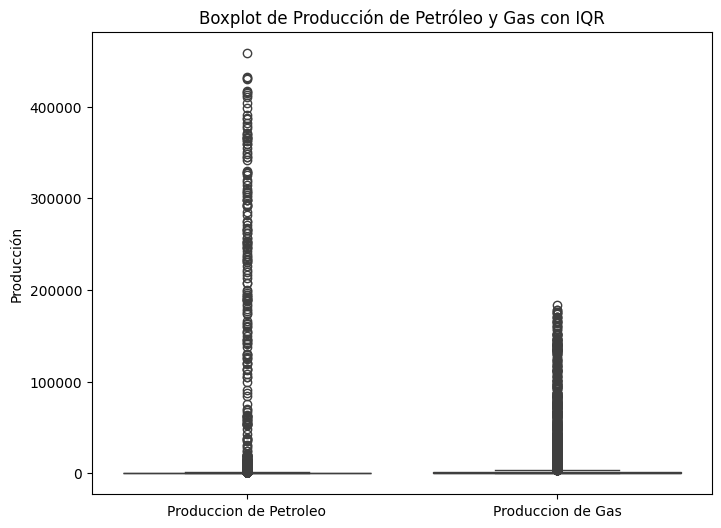

In [ ]:
# rangos intercuartilicos anteriores

import matplotlib.pyplot as plt

# Crear un boxplot para visualizar los rangos intercuartílicos
plt.figure(figsize=(8, 6))
sns.boxplot(data=Produccion_ypf[['Produccion de Petroleo', 'Produccion de Gas']])
plt.title('Boxplot de Producción de Petróleo y Gas con IQR')
plt.ylabel('Producción')
plt.show()

In [ ]:
Consultamos los valores máximos y mínimos para descartar que hayan datos inconsistentes en el dataset.

In [ ]:
#valor máximo y mínimo de producción de petróleo y gas

max_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].max()
min_produccion_petroleo = Produccion_ypf['Produccion de Petroleo'].min()

max_produccion_gas = Produccion_ypf['Produccion de Gas'].max()
min_produccion_gas = Produccion_ypf['Produccion de Gas'].min()

print(f"Valor máximo de producción de petróleo: {max_produccion_petroleo}")
print(f"Valor mínimo de producción de petróleo: {min_produccion_petroleo}")
print(f"Valor máximo de producción de gas: {max_produccion_gas}")
print(f"Valor mínimo de producción de gas: {min_produccion_gas}")

Valor máximo de producción de petróleo: 458378.0
Valor mínimo de producción de petróleo: 0.0
Valor máximo de producción de gas: 183923.0
Valor mínimo de producción de gas: 0.0


In [ ]:
# media para producción de petróleo y producción de gas mensual

media_mensual = Produccion_ypf.groupby(['Año', 'Mes'])[
    ['Produccion de Petroleo', 'Produccion de Gas']
].mean().reset_index()

In [ ]:
media_mensual = media_mensual.sort_values(['Año', 'Mes'])

In [ ]:
print ("Media mensual de producción de petróleo y gas:")
media_mensual

Media mensual de producción de petróleo y gas:


,Año,Mes,Produccion de Petroleo,Produccion de Gas
0,2021.0,1.0,7326.625000,8166.910714
1,2021.0,2.0,6955.053571,7214.446429
2,2021.0,3.0,8512.418182,8379.163636
3,2021.0,4.0,8298.400000,8279.781818
4,2021.0,5.0,8413.072727,10424.581818
5,2021.0,6.0,8118.454545,11726.218182
6,2021.0,7.0,8311.392857,12978.178571
7,2021.0,8.0,8260.070175,13286.333333
8,2021.0,9.0,9087.596491,13252.912281
9,2021.0,10.0,10248.175439,12659.719298


El siguiente gráfico muestra la producción mensual promedio de petróleo y gas desde principios de 2021 hasta marzo de 2025. A continuación, se detallan las observaciones clave:

**Petróleo (línea azul):**

* Presenta una tendencia creciente a lo largo del tiempo.

* Comienza en valores cercanos a los 7.000-8.000 y alcanza más de 18.000 hacia marzo de 2025.

* Tiene fluctuaciones mensuales, pero el crecimiento es sostenido.

**Gas (línea naranja):**

* Muestra un comportamiento más irregular.

* Se observa un rápido crecimiento inicial en 2021, alcanzando un pico en la segunda mitad de ese año.

* Luego, la producción de gas oscila entre 10.000 y 13.000 aproximadamente, sin una tendencia clara de crecimiento o disminución sostenida.

* En algunos periodos recientes (fines de 2024), se ve una leve disminución.

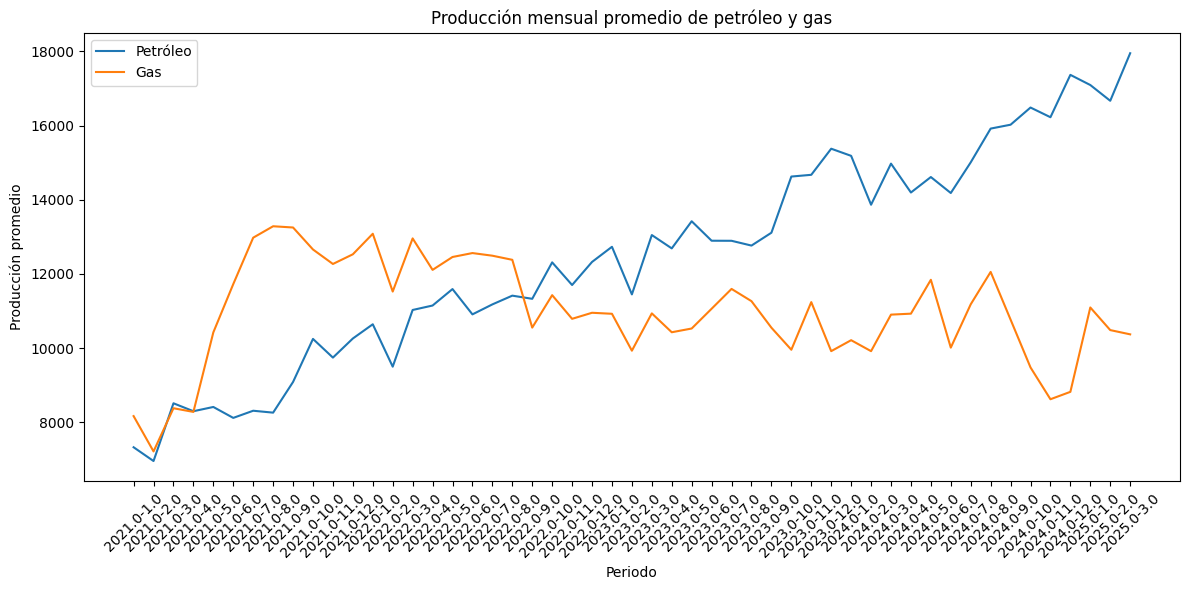

In [ ]:
# Crear una columna "label" tipo 'YYYY-MM' para el eje X
media_mensual['Periodo'] = media_mensual['Año'].astype(str) + '-' + media_mensual['Mes'].astype(str).str.zfill(2)

plt.figure(figsize=(12, 6))
plt.plot(media_mensual['Periodo'], media_mensual['Produccion de Petroleo'], label='Petróleo')
plt.plot(media_mensual['Periodo'], media_mensual['Produccion de Gas'], label='Gas')
plt.xticks(rotation=45)
plt.xlabel('Periodo')
plt.ylabel('Producción promedio')
plt.title('Producción mensual promedio de petróleo y gas')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Con la función columns podemos observar mejor el nombre de todas las columnas del dataset, que en este caso son 47 columnas
Produccion_ypf.columns.tolist()

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Inyección de Agua',
 'Tipo de pozo_Otro tipo',
 'Tipo de pozo_Petrolífero',
 'Tipo de pozo_Sumidero',
 'Tipo de recurso_NO CONVENCIONAL',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_AGUADA DEL CHAÑAR',
 'Area de permiso de concesion_AL NORTE DE LA DORSAL',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BAJO DEL TORO NORTE',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_CERRO ARENA ',
 'Area de permiso de concesion_CERRO LAS MINAS ',
 'Area de permiso de concesion_CERRO MANRIQUE',
 'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
 'Area de permiso de concesion_CN VII A',
 'Area de permiso de concesion_DADIN',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
 'Area de permiso de concesion_FILO MORADO',
 'Area de permiso de conc

In [ ]:
Produccion_ypf.head(25)

,Tipo de pozo_Gasífero,Tipo de pozo_Inyección de Agua,Tipo de pozo_Otro tipo,Tipo de pozo_Petrolífero,Tipo de pozo_Sumidero,Tipo de recurso_NO CONVENCIONAL,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_AGUADA DEL CHAÑAR,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,555.0,18699.0,2021.0,1.0
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,472.0,14314.0,2021.0,2.0
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1082.0,19413.0,2021.0,3.0
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,20456.0,2021.0,4.0
4,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2594.0,25454.0,2021.0,5.0
5,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3382.0,34763.0,2021.0,6.0
6,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2267.0,66193.0,2021.0,7.0
7,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2824.0,72976.0,2021.0,8.0
8,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2671.0,73914.0,2021.0,9.0
9,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1513.0,73796.0,2021.0,10.0


In [ ]:
#Creamos una copia del dataset original
Produccion_ypf_copia = Produccion_ypf.copy()

columnas_a_eliminar = [
    'Tipo de pozo_Inyección de Agua',
    'Tipo de pozo_Otro tipo',
    'Tipo de pozo_Sumidero',
    'Tipo de recurso_NO CONVENCIONAL',
    'Producción de agua',
    'Area de permiso de concesion_AGUADA DEL CHAÑAR',
    'Area de permiso de concesion_AL NORTE DE LA DORSAL',
    'Area de permiso de concesion_BAJO DEL TORO',
    'Area de permiso de concesion_CERRO ARENA ',
    'Area de permiso de concesion_CERRO LAS MINAS ',
    'Area de permiso de concesion_CERRO MANRIQUE',
    'Area de permiso de concesion_CHIHUIDO DE LA SIERRA NEGRA',
    'Area de permiso de concesion_CN VII A',
    'Area de permiso de concesion_DADIN',
    'Area de permiso de concesion_BAJO DEL TORO NORTE',
    'Area de permiso de concesion_ESTACION FERNANDEZ ORO',
    'Area de permiso de concesion_FILO MORADO',
    'Area de permiso de concesion_LA ANGOSTURA SUR I',
    'Area de permiso de concesion_LA ANGOSTURA SUR II',
    'Area de permiso de concesion_LA RIBERA BLOQUE I',
    'Area de permiso de concesion_LA RIBERA BLOQUE II',
    'Area de permiso de concesion_LAS TACANAS'
]

#Con la función drop eliminamos las columnas que consideramos que no son necesarias para el análisis, en este caso solo dejamos las principales áreas de permiso de concesión por producción de petróleo y gas
Produccion_ypf = Produccion_ypf.drop(columns=columnas_a_eliminar, errors='ignore')

Produccion_ypf.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,555.0,18699.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,472.0,14314.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1082.0,19413.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,678.0,20456.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2594.0,25454.0,2021.0,5.0


In [ ]:
Produccion_ypf.astype(int) #aplicamos astype para visualizar los datos en números enteros

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Produccion de Petroleo,Produccion de Gas,Año,Mes
0,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,555,18699,2021,1
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,472,14314,2021,2
2,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1082,19413,2021,3
3,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,678,20456,2021,4
4,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,2594,25454,2021,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3241,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2024,11
3242,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2024,12
3243,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2025,1
3244,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2025,2


In [ ]:
Produccion_ypf.columns.tolist() #Nuevamente aplicamos la función columns para visualizar como quedó el dataset con las columnas eliminadas, ahora son 29 columnas

['Tipo de pozo_Gasífero',
 'Tipo de pozo_Petrolífero',
 'Subtipo de recurso_SHALE',
 'Subtipo de recurso_TIGHT',
 'Area de permiso de concesion_AGUADA DE LA ARENA',
 'Area de permiso de concesion_BAJO DEL TORO  ',
 'Area de permiso de concesion_BANDURRIA SUR',
 'Area de permiso de concesion_EL OREJANO',
 'Area de permiso de concesion_LA AMARGA CHICA',
 'Area de permiso de concesion_LA RIBERA BLOQUE I ',
 'Area de permiso de concesion_LA RIBERA BLOQUE II  ',
 'Area de permiso de concesion_LAS MANADAS',
 'Area de permiso de concesion_LAS TACANAS ',
 'Area de permiso de concesion_LOMA AMARILLA SUR',
 'Area de permiso de concesion_LOMA CAMPANA',
 'Area de permiso de concesion_LOMA DEL MOLLE',
 'Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA',
 'Area de permiso de concesion_LOS CALDENES',
 'Area de permiso de concesion_NARAMBUENA',
 'Area de permiso de concesion_OCTOGONO',
 'Area de permiso de concesion_PASO DE LAS BARDAS NORTE',
 'Area de permiso de concesion_RINCON DEL MANGRUL

### **Regresión Lineal**

La regresión lineal es un modelo estadístico utilizado para predecir el valor de una variable dependiente (objetivo) a partir de una o más variables independientes (predictoras). En su forma más simple (regresión lineal simple), ajusta una línea recta a los datos con la fórmula:

𝑦 = 𝑎 + 𝑏 ⋅ 𝑥

donde:

y es la variable dependiente,
x es la variable independiente,
a es la intersección con el eje Y (intercepto),
b es la pendiente de la recta (coeficiente).

In [ ]:
Produccion_ypf_copia2 = Produccion_ypf.copy() #es la copia del dataframe nuevo que si contiene Produccion de petróleo y Producción de gas

In [ ]:
x = Produccion_ypf.drop(['Produccion de Petroleo','Produccion de Gas'], axis=1)

In [ ]:
x.head()

,Tipo de pozo_Gasífero,Tipo de pozo_Petrolífero,Subtipo de recurso_SHALE,Subtipo de recurso_TIGHT,Area de permiso de concesion_AGUADA DE LA ARENA,Area de permiso de concesion_BAJO DEL TORO,Area de permiso de concesion_BANDURRIA SUR,Area de permiso de concesion_EL OREJANO,Area de permiso de concesion_LA AMARGA CHICA,Area de permiso de concesion_LA RIBERA BLOQUE I,...,Area de permiso de concesion_LOMA LA LATA - SIERRA BARROSA,Area de permiso de concesion_LOS CALDENES,Area de permiso de concesion_NARAMBUENA,Area de permiso de concesion_OCTOGONO,Area de permiso de concesion_PASO DE LAS BARDAS NORTE,Area de permiso de concesion_RINCON DEL MANGRULLO,Area de permiso de concesion_RIO NEUQUEN,Area de permiso de concesion_VALLE DEL RIO GRANDE,Año,Mes
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,1.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,2.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,3.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,4.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2021.0,5.0


In [ ]:
lista_atributos = x.columns

In [ ]:
y = Produccion_ypf[['Produccion de Petroleo','Produccion de Gas']]

In [ ]:
x, y =np.array(x), np.array(y)

In [ ]:
x

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        1.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        2.000e+00],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 0.000e+00, 2.021e+03,
        3.000e+00],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        1.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        2.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 2.025e+03,
        3.000e+00]])

In [ ]:
y[:10]

array([[  555., 18699.],
       [  472., 14314.],
       [ 1082., 19413.],
       [  678., 20456.],
       [ 2594., 25454.],
       [ 3382., 34763.],
       [ 2267., 66193.],
       [ 2824., 72976.],
       [ 2671., 73914.],
       [ 1513., 73796.]])

### **Separando Train-Test**

Antes de entrenar el modelo, dividimos el dataset en dos partes:

1. Conjunto de entrenamiento (train): se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda la relación entre las variables.

2. Conjunto de prueba (test): se utiliza para evaluar el desempeño del modelo con datos que no ha visto antes, simulando cómo funcionará con datos nuevos.

Esto es importante para evitar el sobreajuste (overfitting), que ocurre cuando el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien.

In [ ]:
# Importamos la librearia para separar el dataset.
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,
                                                    random_state=42)  #un numero aleatorio para fijar cuantas veces testeamos

In [ ]:
x.shape

(3246, 26)

In [ ]:
X_train.shape

(2596, 26)

In [ ]:
y_test.shape

(650, 2)

In [ ]:
X_test.shape

(650, 26)

In [ ]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

**Interpretación del gráfico**

* Ambos modelos presentan outliers (residuos muy altos o muy bajos), especialmente el de Petróleo.

* Hay residuos del modelo de Petróleo que superan los +250,000 y bajan a -100,000, lo cual es significativo.

* La mediana de los residuos en ambos casos está cerca de cero (lo cual es bueno), pero hay más asimetría y dispersión en el modelo de Petróleo.

* El modelo de Gas tiene residuos más concentrados y menos extremos → mejor comportamiento en cuanto a error.

**Conclusión:**

* El modelo predice el Gas con menor error y mayor consistencia que el Petróleo.

* El modelo de Petróleo tiene mayor varianza en sus residuos, lo que puede indicar:

1. Variables predictoras insuficientes o poco informativas.

2. Heterocedasticidad.

3. Outliers reales o errores de medición.

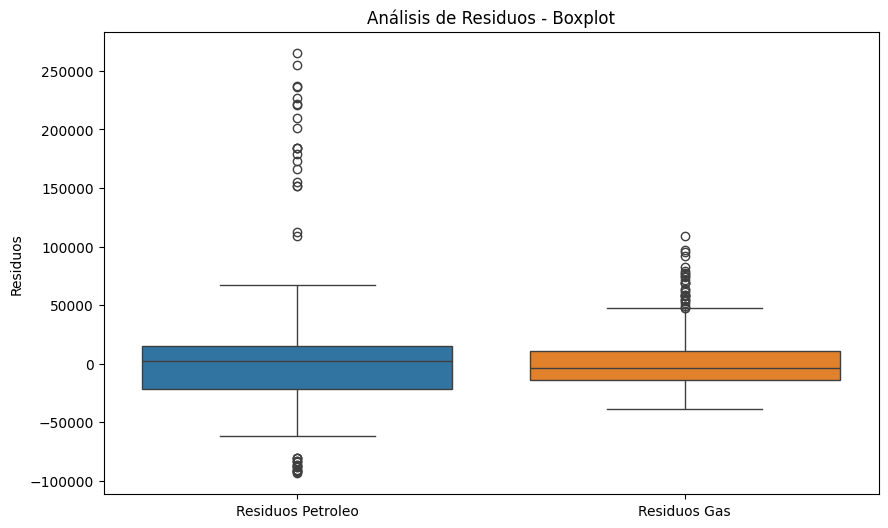

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular los residuos
residuals = y_test - y_pred

# Crear un DataFrame con los residuos para facilitar el ploteo
residuals_df = pd.DataFrame(residuals, columns=['Residuos Petroleo', 'Residuos Gas'])

# Crear boxplots para los residuos
plt.figure(figsize=(10, 6))
sns.boxplot(data=residuals_df)
plt.title('Análisis de Residuos - Boxplot')
plt.ylabel('Residuos')
plt.show()


**Análisis del gráfico: Producción Real vs. Predicha (Regresión Lineal)**

* El gráfico compara los valores reales de producción de petróleo (eje X) con los valores predichos por el modelo (eje Y).

* Idealmente, si el modelo predijera perfectamente, todos los puntos estarían alineados sobre la diagonal que va del origen (0,0) hacia la parte superior derecha (línea y = x).

**Observaciones principales:**

* Distribución dispersa y agrupada en torno a cero:

Hay una gran concentración de puntos en valores cercanos a cero en el eje X (producción real), con una amplia dispersión en el eje Y (predicciones).

Esto indica que el modelo realiza predicciones erráticas cuando la producción real es baja, incluso arrojando valores negativos, lo cual no es físicamente posible en este contexto.

* Subestimación y sobreestimación:

En los valores intermedios y altos de producción real, las predicciones tienden a concentrarse en un rango fijo, aproximadamente entre 100.000 y 150.000.

Esto sugiere que el modelo no está captando adecuadamente la variabilidad en los niveles altos de producción: predice valores similares para distintas producciones reales.
.

**Análisis de gráfico: Distribución de los Errores de Predicción: Petróleo vs. Gas**

Este histograma representa la distribución de los errores de predicción, es decir, la diferencia entre los valores reales y los predichos por los modelos aplicados a la producción de petróleo y gas.

* **Errores de Petróleo (azul):**

La distribución presenta una asimetría hacia la derecha (cola positiva), lo que indica que el modelo tiende a subestimar la producción en varios casos.

Aunque la mayoría de los errores se concentran cerca de 0, hay una dispersión significativa, con errores que superan los ±200.000.

Esto refleja una mayor variabilidad e imprecisión en las predicciones del modelo aplicado al petróleo.

**Errores de Gas (naranja):**

Los errores están más concentrados en torno a 0, lo que sugiere una mayor precisión del modelo de gas.

La distribución es más estrecha y simétrica, con menor dispersión de valores extremos.

Esto puede indicar que el modelo captura mejor los patrones subyacentes en los datos de gas.

**Conclusiones:**

El modelo para gas muestra un comportamiento más estable y preciso, con errores más pequeños y centrados.

En cambio, el modelo de petróleo presenta una mayor dispersión y errores extremos, lo que podría implicar:

* Mayor complejidad en los datos del petróleo.

* Necesidad de mejorar el preprocesamiento o el ajuste del modelo.

* Inclusión de nuevas variables explicativas o uso de otro algoritmo.

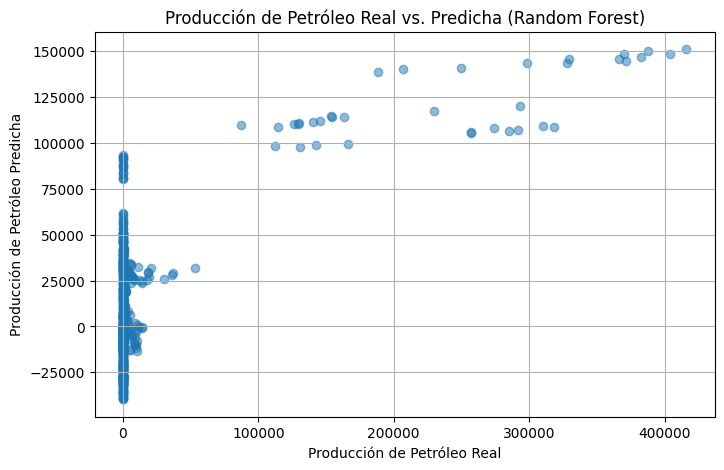

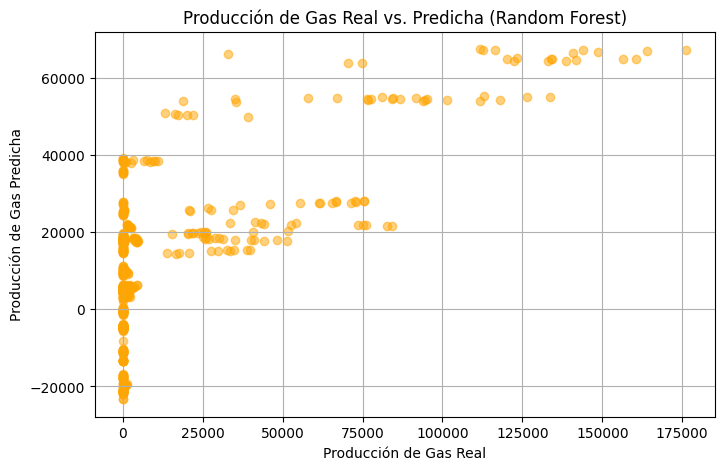

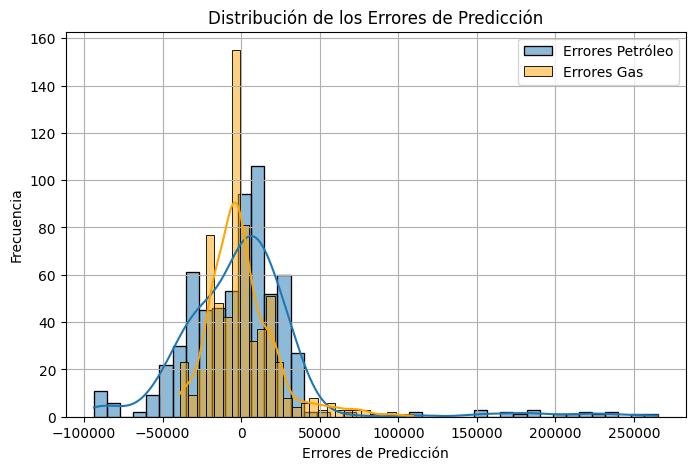

In [ ]:
import matplotlib.pyplot as plt

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (Random Forest)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo = y_test[:, 0] - y_pred[:, 0]
errors_gas = y_test[:, 1] - y_pred[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción')
plt.legend()
plt.grid(True)
plt.show()


**Análisis de Gráfico de Residuos vs. Valores predichos**

**Petróleo**

* Se observa una dispersión creciente a medida que aumentan los valores predichos.

* Muchos residuos se alejan bastante del eje cero en los extremos (sobre todo valores altos predichos).

* Esto indica heterocedasticidad: los errores no tienen varianza constante.

**Gas**

* Aunque hay cierta variabilidad, la dispersión es más uniforme a lo largo del eje X.

* Aun así, parece haber una mayor concentración de residuos cuando los valores predichos son bajos.

* Hay indicios leves de heterocedasticidad, pero es mucho menor que en el caso del petróleo.

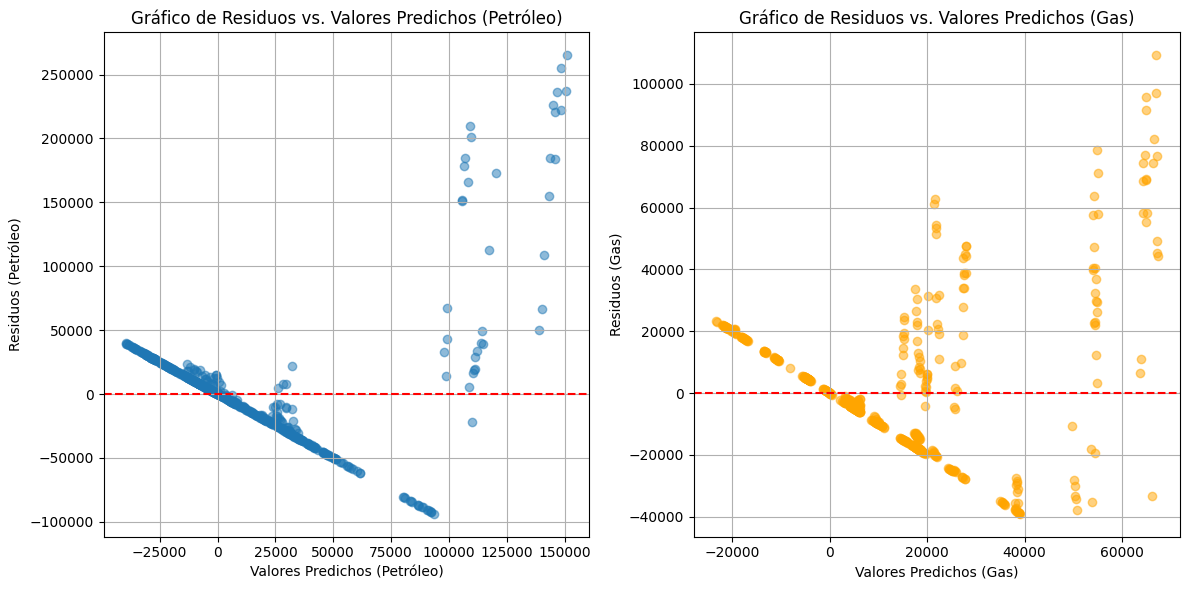

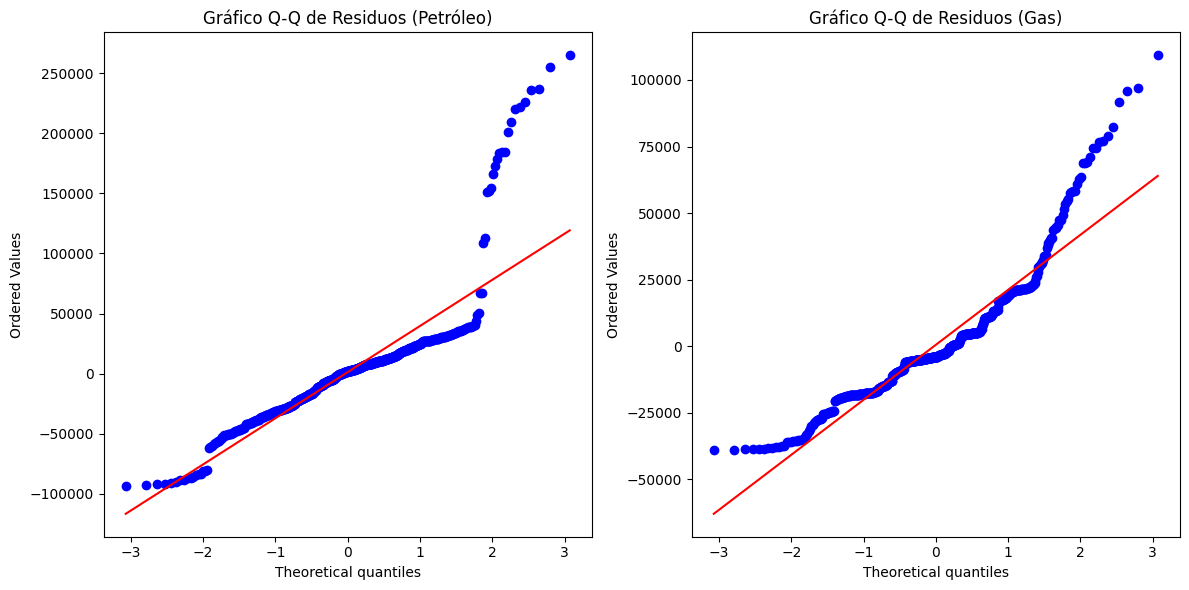

In [ ]:
#gráfico de residuos

import matplotlib.pyplot as plt
# Generar gráfico de residuos vs. valores predichos
plt.figure(figsize=(12, 6))

# Gráfico de residuos para Produccion de Petroleo
plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals[:, 0], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos (Petróleo)')
plt.ylabel('Residuos (Petróleo)')
plt.title('Gráfico de Residuos vs. Valores Predichos (Petróleo)')
plt.grid(True)

# Gráfico de residuos para Produccion de Gas
plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals[:, 1], alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Predichos (Gas)')
plt.ylabel('Residuos (Gas)')
plt.title('Gráfico de Residuos vs. Valores Predichos (Gas)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Gráfico Q-Q para verificar la normalidad de los residuos
plt.figure(figsize=(12, 6))

# Gráfico Q-Q para residuos de Petróleo
plt.subplot(1, 2, 1)
stats.probplot(residuals[:, 0], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos (Petróleo)')

# Gráfico Q-Q para residuos de Gas
plt.subplot(1, 2, 2)
stats.probplot(residuals[:, 1], dist="norm", plot=plt)
plt.title('Gráfico Q-Q de Residuos (Gas)')

plt.tight_layout()
plt.show()

**Normalidad de los errores**

Con el histograma se puede visualizar la distribución normal de los errores.

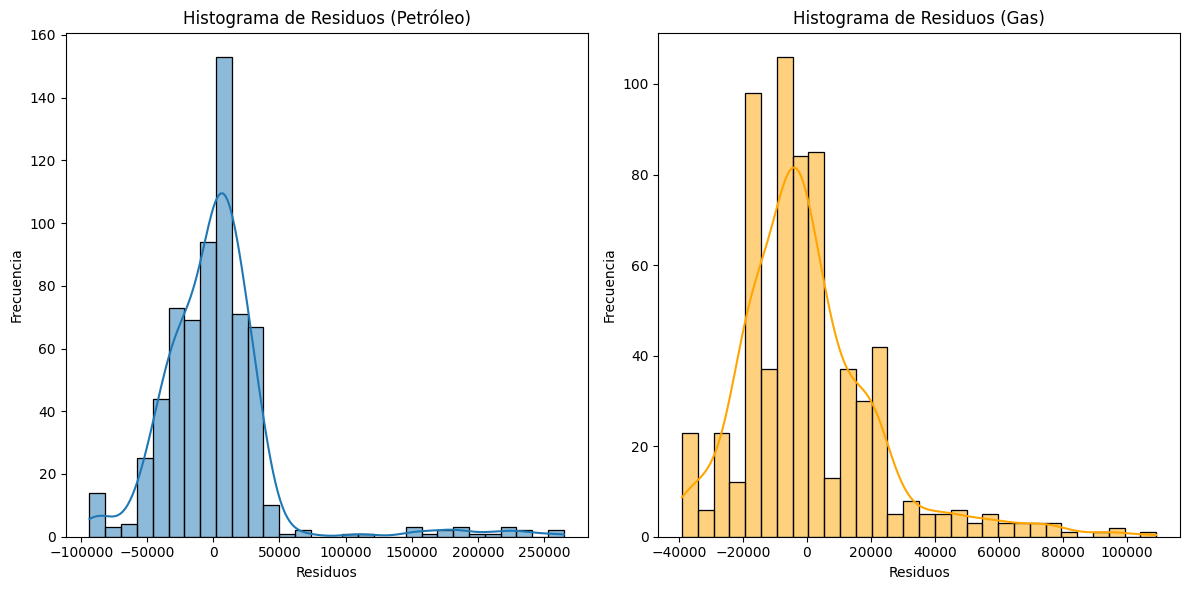

In [ ]:
# prompt: histograma de residuos

import matplotlib.pyplot as plt
# Crear histogramas para los residuos
plt.figure(figsize=(12, 6))

# Histograma para residuos de Petróleo
plt.subplot(1, 2, 1)
sns.histplot(residuals[:, 0], kde=True, bins=30)
plt.title('Histograma de Residuos (Petróleo)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

# Histograma para residuos de Gas
plt.subplot(1, 2, 2)
sns.histplot(residuals[:, 1], kde=True, bins=30, color='orange')
plt.title('Histograma de Residuos (Gas)')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

### **Random Forest**

Random Forest es un modelo de aprendizaje automático basado en un conjunto de árboles de decisión. Funciona creando múltiples árboles con diferentes subconjuntos del dataset y promediando sus predicciones (en regresión). Esto mejora la precisión y robustez del modelo, reduciendo el riesgo de sobreajuste que suele tener un único árbol.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
# Inicializo el modelo
regresor = RandomForestRegressor(criterion='absolute_error', random_state=25, n_estimators=20,max_depth=5,max_features='sqrt')

In [ ]:
# Entreno el modelo
regresor.fit(X_train, y_train);

In [ ]:
regresor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'absolute_error',
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 25,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# Predigo los valores para el set de testeo
y_pred = regresor.predict(X_test)

y_pred

array([[     0.   ,      0.   ],
       [119963.625,  22186.45 ],
       [   302.1  ,    163.2  ],
       ...,
       [     0.   ,      0.   ],
       [ 24715.8  ,   3100.35 ],
       [   206.35 ,   8435.575]])

**MAE (Mean Absolute Error)**

El MAE es una métrica que mide el error promedio entre los valores reales y los valores predichos por un modelo. Se calcula tomando el promedio de las diferencias absolutas. Es fácil de interpretar porque mantiene las mismas unidades que la variable objetivo. Cuanto menor es el MAE, mejor es la precisión del modelo.

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred)

10260.894480769231

In [ ]:
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f'MAPE: {mape:.2f}%')

MAPE: nan%


<ipython-input-139-e89657d792ca>:1: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
<ipython-input-139-e89657d792ca>:1: RuntimeWarning: invalid value encountered in divide
  mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100


**Árbol de Decisión del Modelo Random Forest**

Este árbol muestra cómo el modelo toma decisiones dividiendo los datos en función de distintas variables, como profundidad, área de concesión, tipo de pozo, etc. En cada nodo, se realiza una división basada en un umbral que minimiza el error absoluto. Los valores en los nodos incluyen:

* samples: cantidad de muestras que llegan a ese nodo.

* value: valor promedio predicho.

* absolute_error: error absoluto promedio en ese nodo.

Esto ayuda a interpretar qué variables fueron más relevantes para las predicciones del modelo.

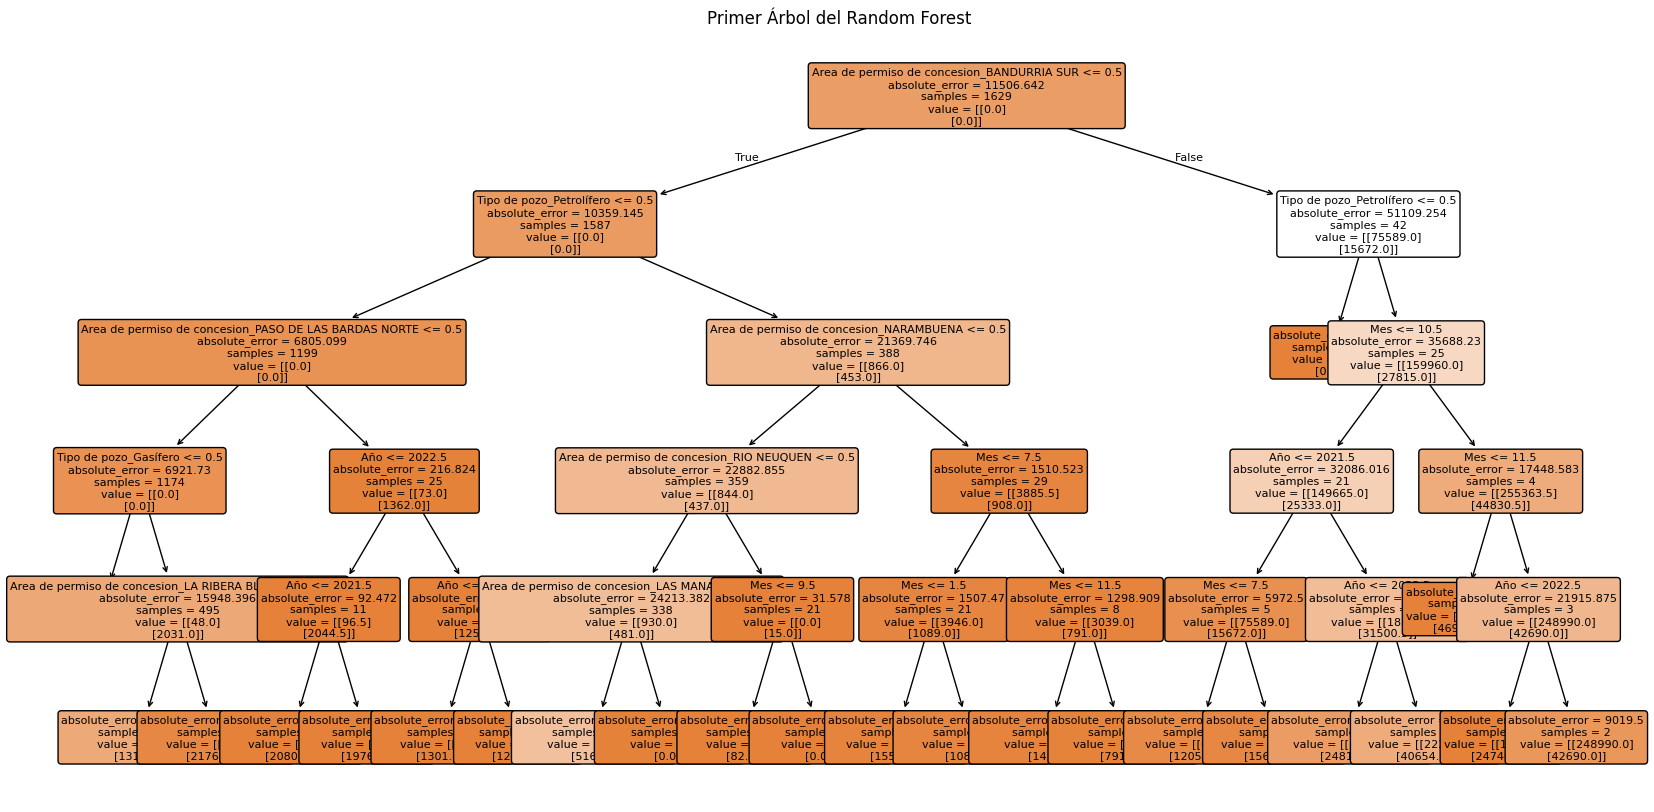

In [ ]:
# prompt: me podes generar un gráfico de arbol

import matplotlib.pyplot as plt
!pip install scikit-learn matplotlib

from sklearn.tree import plot_tree

# Asumo que ya tienes un modelo de RandomForestRegressor entrenado llamado 'regresor'
# y que 'lista_atributos' contiene los nombres de las características.

# Asegúrate de que el modelo es un RandomForestRegressor
if isinstance(regresor, RandomForestRegressor):
  # Visualiza el primer árbol del bosque
  plt.figure(figsize=(20, 10))
  plot_tree(regresor.estimators_[0],
            feature_names=lista_atributos.tolist(),  # Asegúrate de que sea una lista
            filled=True,
            rounded=True,
            fontsize=8)
  plt.title("Primer Árbol del Random Forest")
  plt.show()
else:
  print("El modelo 'regresor' no es un RandomForestRegressor.")


### **Support Vector Machine**

Support Vector Machine (SVM) es un modelo de aprendizaje supervisado que utilizamos para predecir variables clave del sector energético, como la producción de petróleo y gas. SVM busca el hiperplano que mejor separa los datos históricos, maximizando el margen entre los distintos niveles de producción. Además, permite aplicar funciones núcleo (kernels) para capturar relaciones no lineales entre variables.

In [ ]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error

In [ ]:
multi_svr = MultiOutputRegressor(SVR())
multi_svr.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR())

In [ ]:
multi_svr.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'rbf',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(),
 'n_jobs': None}

In [ ]:
y_pred_svr = multi_svr.predict(X_test)

y_pred_svr

array([[0.09992009, 0.09987949],
       [0.10021708, 0.10022631],
       [0.10012096, 0.10015563],
       ...,
       [0.09995772, 0.09994865],
       [0.10020436, 0.10019377],
       [0.10002332, 0.10014291]])

In [ ]:
# Calculo el error medio absoluto
mean_absolute_error(y_test, y_pred_svr)

13124.606995389984

**Análisis del gráfico de la Producción de Petróleo Real vs. Predicha (SVR)**

En este gráfico de dispersión se observa la relación entre la producción real de petróleo y las predicciones realizadas por el modelo SVR (Support Vector Regression).

El modelo no logra capturar adecuadamente la variabilidad de los datos reales, ya que predice casi un valor constante (~0.1) independientemente del valor real. Esto indica un sobreajuste extremo o una mala parametrización del modelo, resultando en una baja capacidad predictiva.

**Análisis del gráfico de la Producción de Gas Real vs. Predicha (SVR)**

El gráfico muestra la comparación entre la producción real de gas y las predicciones generadas por el modelo SVR (Support Vector Regression). Se observa una gran dispersión de los puntos y una falta de correlación clara entre los valores reales y los predichos, lo que evidencia un desempeño deficiente del modelo para capturar la dinámica de la variable objetivo.

Este comportamiento nos sugiere que el modelo no está generalizando correctamente y podría necesitar un mejor ajuste de parámetros o un preprocesamiento más adecuado de los datos.

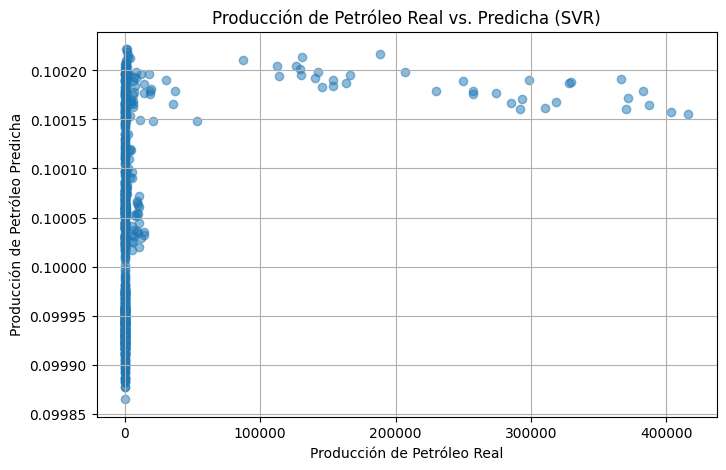

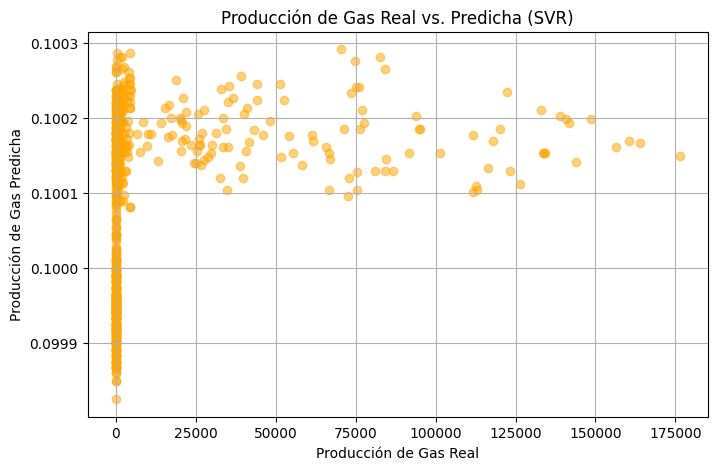

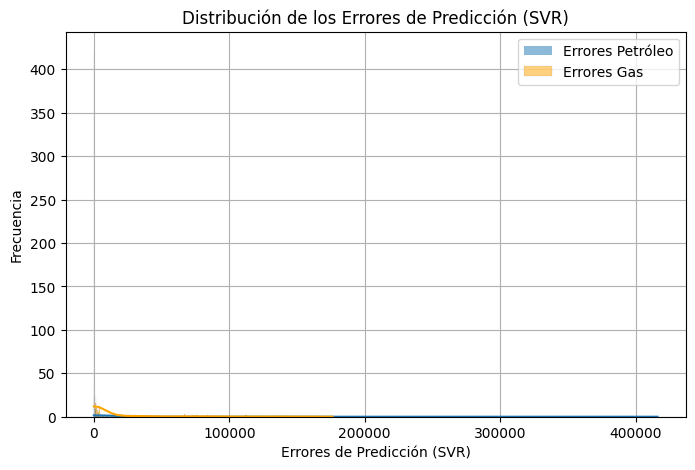

In [ ]:
# gráfico support vector machine para este caso

import matplotlib.pyplot as plt
# Visualizar los resultados para 'Produccion de Petroleo' (primera columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 0], y_pred_svr[:, 0], alpha=0.5)
plt.xlabel('Producción de Petróleo Real')
plt.ylabel('Producción de Petróleo Predicha')
plt.title('Producción de Petróleo Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# Visualizar los resultados para 'Produccion de Gas' (segunda columna de y)
plt.figure(figsize=(8, 5))
plt.scatter(y_test[:, 1], y_pred_svr[:, 1], alpha=0.5, color='orange')
plt.xlabel('Producción de Gas Real')
plt.ylabel('Producción de Gas Predicha')
plt.title('Producción de Gas Real vs. Predicha (SVR)')
plt.grid(True)
plt.show()

# También puedes visualizar la distribución de los errores
errors_petroleo_svr = y_test[:, 0] - y_pred_svr[:, 0]
errors_gas_svr = y_test[:, 1] - y_pred_svr[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(errors_petroleo_svr, kde=True, label='Errores Petróleo')
sns.histplot(errors_gas_svr, kde=True, label='Errores Gas', color='orange')
plt.xlabel('Errores de Predicción (SVR)')
plt.ylabel('Frecuencia')
plt.title('Distribución de los Errores de Predicción (SVR)')
plt.legend()
plt.grid(True)
plt.show()


### **XGBoost**

XGBoost (Extreme Gradient Boosting) es un modelo de aprendizaje supervisado basado en árboles de decisión, diseñado para lograr alta precisión y eficiencia. Utiliza la técnica de boosting, que construye múltiples árboles de manera secuencial, donde cada árbol nuevo corrige los errores del anterior.

En este proyecto, XGBoost se aplica para predecir la producción de petróleo y la producción de gas, utilizando como variables explicativas datos históricos como las áreas de permiso de concesión, el subtipo de recurso, el tipo de pozo, etc.

Gracias a su capacidad para manejar relaciones no lineales y su mecanismo de regularización, XGBoost resulta especialmente útil para modelar fenómenos complejos del sector energético con gran precisión.

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modelo_xgb = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.3,
    subsample=1.0,
    colsample_bytree=1.0,
    objective='reg:squarederror',  # Para regresión
    random_state=42
)

In [ ]:
modelo_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred_xgb = modelo_xgb.predict(X_test)

**Evaluación del modelo XGBoost**

**MAE (Mean Absolute Error): 3541.71**
El error absoluto medio representa la magnitud promedio de los errores en las predicciones, sin considerar si son positivos o negativos. En este caso, el modelo tiene un error promedio de aproximadamente 3541 unidades, lo cual indica cuán lejos están, en promedio, las predicciones de los valores reales.

**RMSE (Root Mean Squared Error): 7579.92**
La raíz del error cuadrático medio penaliza más fuertemente los errores grandes (por elevar al cuadrado las diferencias antes de promediarlas). Un RMSE de 7579.92 sugiere que, aunque el error medio absoluto es bajo, existen algunos casos con errores más altos que impactan esta métrica. Es útil para detectar posibles outliers o variabilidad significativa.

**R² (Coeficiente de determinación): 0.9568**
Este valor indica el porcentaje de la variabilidad de la variable dependiente que el modelo es capaz de explicar. En este caso, un R² de 0.9568 significa que el 95.68% de la variabilidad en la producción real está siendo explicada por el modelo, lo cual es un excelente desempeño.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_xgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))  # Esto equivale a squared=False
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 3541.71227182425
RMSE: 7579.920128684703
R²: 0.9567754942439126


### **Optimización: Gridsearch**

GridSearch es una técnica que prueba todas las combinaciones posibles de un conjunto definido de valores para los hiperparámetros del modelo. Evalúa cada combinación usando validación cruzada y selecciona la que da el mejor resultado según una métrica.

En el caso de XGBoost, algunos hiperparámetros comunes que se optimizan son:

* n_estimators: número de árboles a entrenar.

* max_depth: profundidad máxima de cada árbol.

* learning_rate: cuánto ajusta cada árbol nuevo los errores del anterior.

* subsample: proporción de muestras usadas en cada árbol.

* colsample_bytree: proporción de características utilizadas por árbol.

* gamma, reg_alpha, reg_lambda: parámetros de regularización.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9, 1]
}

xgb = XGBRegressor(random_state=42)

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

grid_search.fit(X_train, y_train)
print("Mejores parámetros:", grid_search.best_params_)

Mejores parámetros: {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 50, 'subsample': 1}


In [ ]:
best_model = grid_search.best_estimator_

**Evaluación del modelo XGBoost Optimizado (GridSearch)**

**MAE (Mean Absolute Error): 2425.88**
El error absoluto medio bajó a 2425.88, lo que significa que el modelo mejorado comete un error promedio menor en sus predicciones respecto al modelo anterior. Esto indica una mejora en la precisión general.

**RMSE (Root Mean Squared Error): 6447.63**
La raíz del error cuadrático medio también se redujo a 6447.63. Dado que esta métrica penaliza más los errores grandes, una reducción en el RMSE implica que el modelo ahora es más robusto frente a valores atípicos o predicciones muy desviadas.

**R² (Coeficiente de determinación): 0.9666**
El coeficiente de determinación subió a 0.9666, lo que implica que el modelo ahora explica el 96.66% de la variabilidad en los datos reales. Esto representa una mejora en la capacidad explicativa del modelo.

**Conclusión:** la optimización del modelo mediante GridSearch mejoró significativamente su desempeño en todas las métricas. Esto demuestra que la búsqueda de hiperparámetros adecuados tuvo un impacto positivo, haciendo el modelo más preciso y confiable.

In [ ]:
y_pred = best_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MAE: 2425.8764956210207
RMSE: 6447.626699963413
R²: 0.9666041785545363


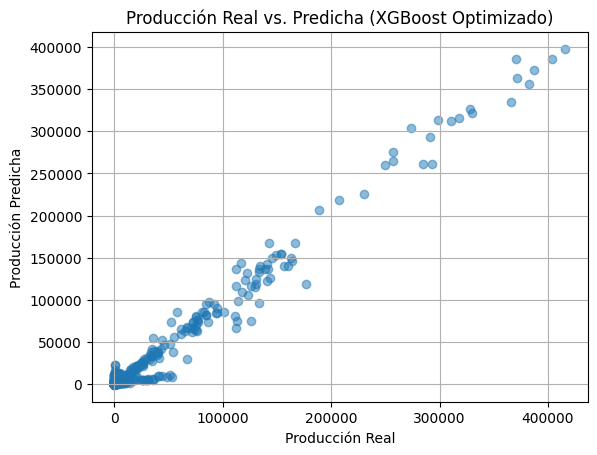

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Producción Real")
plt.ylabel("Producción Predicha")
plt.title("Producción Real vs. Predicha (XGBoost Optimizado)")
plt.grid(True)
plt.show()

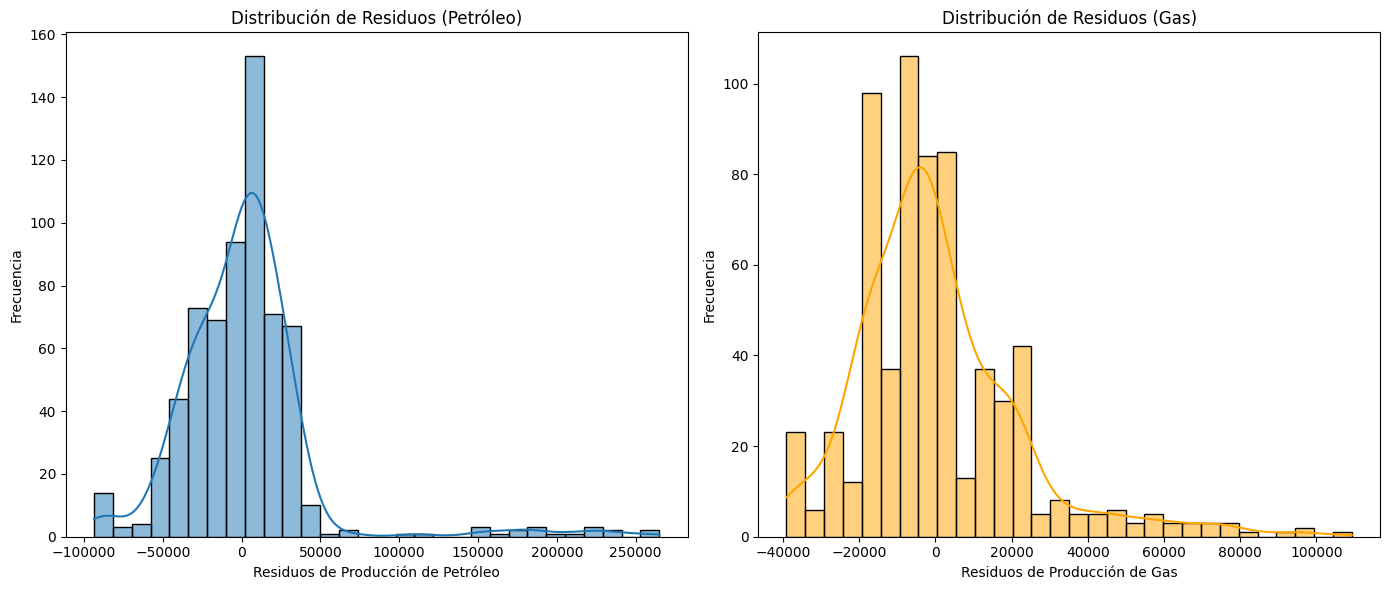

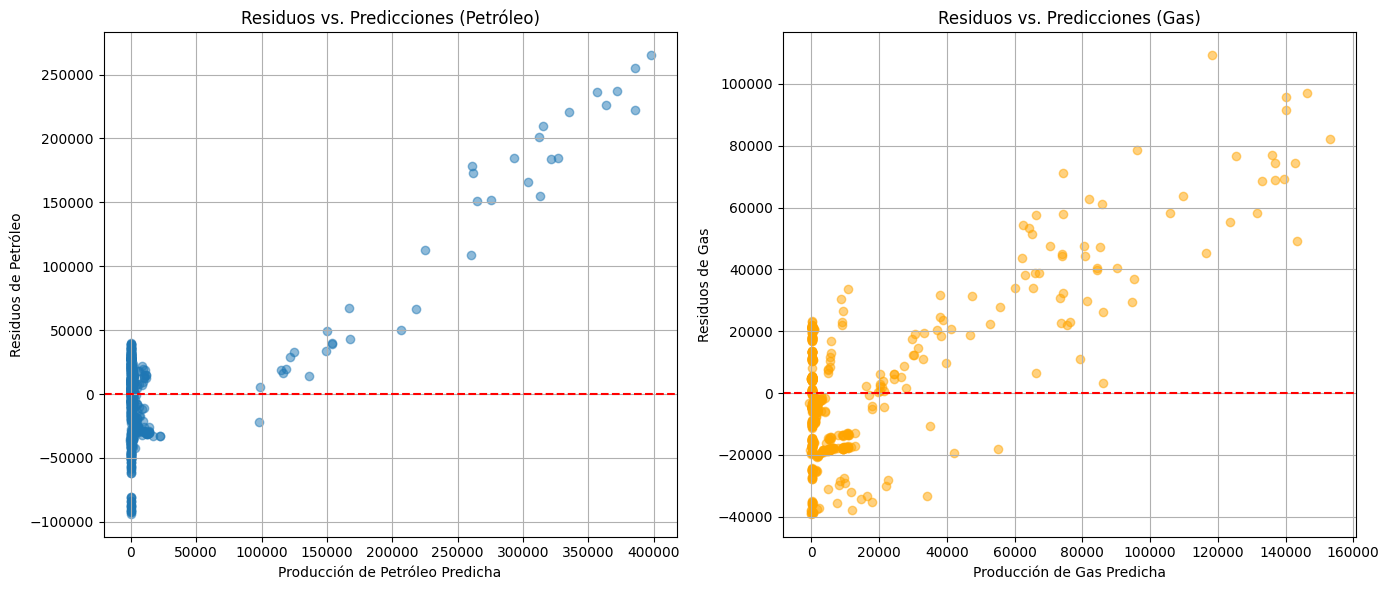

In [ ]:
# grafico de produccion de petroleo y gas por separado y de los residuos

import matplotlib.pyplot as plt
# Visualizar los residuos de la regresión lineal para Petróleo y Gas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_df['Residuos Petroleo'], kde=True, bins=30)
plt.title('Distribución de Residuos (Petróleo)')
plt.xlabel('Residuos de Producción de Petróleo')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
sns.histplot(residuals_df['Residuos Gas'], kde=True, bins=30, color='orange')
plt.title('Distribución de Residuos (Gas)')
plt.xlabel('Residuos de Producción de Gas')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Visualizar los residuos vs. valores predichos para identificar patrones
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_pred[:, 0], residuals_df['Residuos Petroleo'], alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Producción de Petróleo Predicha')
plt.ylabel('Residuos de Petróleo')
plt.title('Residuos vs. Predicciones (Petróleo)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_pred[:, 1], residuals_df['Residuos Gas'], alpha=0.5, color='orange')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Producción de Gas Predicha')
plt.ylabel('Residuos de Gas')
plt.title('Residuos vs. Predicciones (Gas)')
plt.grid(True)

plt.tight_layout()
plt.show()